# Part I: Multi-layer Perceptron with sklearn

- Author: Archit YADAV

## 1 Learning Boolean Operators

### 1. Classifier for AND operator

In [3]:
#import classifier as classifier
import numpy as np
from sklearn.neural_network import MLPClassifier 
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 0, 0, 1] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

### 2. Classifier for OR operator

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 1] # Outputs

X_test = [[1., 0.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

### 2. Classifier for XOR operator

#### (a)

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

#### (b)

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(4, 4), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

#### (c)

In [ ]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(4, 4),
                           activation="tanh", solver='lbfgs', max_iter=1000)
classifier.fit(X, y)

classifier.predict(X_test)


array([0])

## 2 Image Classification

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dataset = load_digits()
X = dataset.data # inputs
y = dataset.target # Associated outputs

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state=3)
print(train_X.shape)

(1617, 64)


In [36]:
classifier = MLPClassifier(hidden_layer_sizes=1000,
                           activation="logistic",
                           solver='sgd', tol=1e-10, max_iter=100000)
classifier.fit(train_X, train_y)
classifier.predict(test_X)

from sklearn.metrics import accuracy_score

test_y_pred = classifier.predict(test_X) # Predicted results
print(" Accuracy: ", accuracy_score(test_y, test_y_pred ))

 Accuracy:  0.9722222222222222


| Experiment No. | Hidden Layers | Activation | Solver | Iterations |   Accuracy   |
|:--------------:|:-------------:|:----------:|:------:|:----------:|:------------:|
|        1       |      100      |  identity  |  lbfgs |    1000    | [0.95, 0.96] |
|        2       |      100      |    tanh    |  lbfgs |    1000    |     0.96     |
|        3       |      100      |  logistic  |  lbfgs |    1000    |     0.96     |
|        4       |      100      |  logistic  |  lbfgs |    10000   |     0.97     |
|        5       |      1000     |  logistic  |   sgd  |   100000   |     0.97     |


Observations:

* `sgd` required more iterations (10k) to converge, compared to other solvers based classifiers (1k)
* It's difficult to conclude which classifier performs the best. Increasing the iterations as well as number of hidden layers seem to indicate towards a slightly higher accuracy.

---

# Part II: PyTorch and CNN

## 1. PyTorch Tensor Basics

In [ ]:
import torch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# 4X4 tensor matrix
tensor = torch.ones(4, 4)
tensor = tensor + 2

# Add 1 to each element
tensor2 = tensor + 1

print(tensor)
print(tensor2)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [ ]:
# tensor multiplication
tensor * tensor2

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.]])

## 2. Torch Autograd

Say, we want to compute the derivative of the following equation:

$Q = 3a^3 - b^2$

We know that

$\frac{\partial Q}{\partial a} = 9a^2$

and

$\frac{\partial Q}{\partial b} = -2b$

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

print(a)
print(b)

Q = 3*a**3 - b**2

tensor([2., 3.], requires_grad=True)
tensor([6., 4.], requires_grad=True)


In [ ]:
# Gradient of Q wrt itself = 1
external_grad = torch.tensor([1., 1.])

Q.backward(gradient=external_grad, retain_graph=True)

print("Gradient of Q wrt a:", a.grad)
print("Gradient of Q wrt a:", b.grad)

Gradient of Q wrt a: tensor([144., 324.])
Gradient of Q wrt a: tensor([-48., -32.])


In [ ]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [ ]:
prediction = model(data) # forward pass

loss = (prediction - labels).sum()
loss.backward() # backward pass

In [ ]:
# Load SGD optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Initiate gradient descent
optim.step() #gradient descent


## 3. LeNet Network for MNIST

The goal is to play around with a NN architecture and test it on
MNIST dataset for image based digit classification.
Comparison by tweaking various parameters and with
MLP model will also be done.

References:

* [PyTorch docs](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
* [TDS article](https://towardsdatascience.com/implementing-yann-lecuns-lenet-5-in-pytorch-5e05a0911320)
* [Medium article](https://medium.datadriveninvestor.com/architecture-implementation-of-lenet-from-scratch-in-pytorch-709cc38c00a9)

In [39]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim


In [40]:
# Transformations on data
transform = transforms.Compose([transforms.Pad(2), transforms.ToTensor(),
                              transforms.Normalize((0.5,),
                                                   (0.5,)),
                              ])
# Normalize: to normalize the tensor with mean and std. dev.

### Download the dataset

Unzip the data.zip, which contains the MNIST dataset and was downloaded once.

In [42]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/MNIST/
   creating: data/MNIST/processed/
  inflating: data/MNIST/processed/test.pt  
  inflating: data/MNIST/processed/training.pt  
   creating: data/MNIST/raw/
  inflating: data/MNIST/raw/t10k-images-idx3-ubyte  
 extracting: data/MNIST/raw/t10k-images-idx3-ubyte.gz  
  inflating: data/MNIST/raw/t10k-labels-idx1-ubyte  
 extracting: data/MNIST/raw/t10k-labels-idx1-ubyte.gz  
  inflating: data/MNIST/raw/train-images-idx3-ubyte  
 extracting: data/MNIST/raw/train-images-idx3-ubyte.gz  
  inflating: data/MNIST/raw/train-labels-idx1-ubyte  
 extracting: data/MNIST/raw/train-labels-idx1-ubyte.gz  


### Define all parameters

In [43]:
DOWNLOAD = False      # To download the dataset or not
BATCH_SIZE = 64
LEARNING_RATE = 0.001
KERNAL_SIZE_CONV = 5
KERNAL_SIZE_POOL = 2
STRIDE_CONV = 1
STRIDE_POOL = 2
EPOCHS = 2

In [44]:
# Download the datasets
trainset = datasets.MNIST('./data', download=DOWNLOAD, train=True, transform=transform)
valset = datasets.MNIST('./data', download=DOWNLOAD, train=False, transform=transform)

In [45]:
# Feed the datasets to DataLoader
# Read 64 images at a time
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE, shuffle=True)

dataset_sizes = {'train':len(trainset), 'test':len(valset)}


### Plot few samples of the dataset

Load 1 batch (64 images) of the input dataset, and check the label corresponding to the first 8 digits.

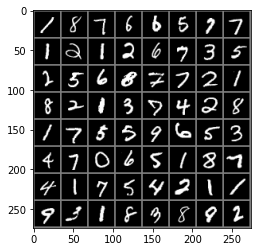

Labels of first row:

 1  8  7  6  6  5  7  7


In [46]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Labels of first row:\n")
print(' '.join('%2s' % classes[labels[j]] for j in range(8)))

In [47]:
images.size()

torch.Size([64, 1, 32, 32])

`torch.Size([64, 1, 32, 32])` means we have images of diemnsion 32x32, each having 1 channel only (aka grayscale) and a `batch_size` of 64.

### The LeNet architecture

In [48]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, 
                              kernel_size = KERNAL_SIZE_CONV, stride = STRIDE_CONV, padding = 0)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, 
                              kernel_size = KERNAL_SIZE_CONV, stride = STRIDE_CONV, padding = 0)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, 
                              kernel_size = KERNAL_SIZE_CONV, stride = STRIDE_CONV, padding = 0)
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)
        self.tanh = nn.Tanh()
        self.avgpool = nn.AvgPool2d(kernel_size = KERNAL_SIZE_POOL, stride = STRIDE_POOL)

    def forward(self, x):
        x = self.conv1(x)
        x = self.tanh(x)
        x = self.avgpool(x)
        x = self.conv2(x)
        x = self.tanh(x)
        x = self.avgpool(x)
        x = self.conv3(x)
        x = self.tanh(x)
        # print(x.shape)
        
        # x = x.reshape(-1, x.shape[1])
        x = x.reshape(x.shape[0], -1)
        # print(x.shape)
        x = self.linear1(x)
        x = self.tanh(x)
        x = self.linear2(x)
        return x
    

### Summary of the constructed model

In [49]:
from torchsummary import summary

# N_CLASSES = 10
model = LeNet()

# Generate a random tensor of 64 sets of 32x32 numbers
x = torch.randn(64,1,32,32)
output = model(x)

print(model)
summary(model, (1,32,32))
print("output.shape : ", output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=10, bias=True)
  (tanh): Tanh()
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8        

### Define a loss function and optimizer

In [54]:
import torch.optim as optim

model = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

### Train the network

We take every batch of our data (`batch_size`) and feed them to the model and evalaute the loss. We do this for `EPOCH` number of times.

In [55]:

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0

    # train phase, just set the mode
    # (to tell the model that we're now gonna train)
    model.train()

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        # print("Input size:", inputs.shape)
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.4f' %
                  (epoch + 1, i, running_loss / 2000))
            running_loss = 0.0

    print("Epoch ", epoch + 1, " done")

print('Finished Training')

[1,     0] loss: 0.0012
[1,   100] loss: 0.1147
[1,   200] loss: 0.1136
[1,   300] loss: 0.1115
[1,   400] loss: 0.1067
[1,   500] loss: 0.0974
[1,   600] loss: 0.0835
[1,   700] loss: 0.0680
[1,   800] loss: 0.0560
[1,   900] loss: 0.0457
Epoch  1  done
[2,     0] loss: 0.0004
[2,   100] loss: 0.0375
[2,   200] loss: 0.0337
[2,   300] loss: 0.0306
[2,   400] loss: 0.0278
[2,   500] loss: 0.0269
[2,   600] loss: 0.0249
[2,   700] loss: 0.0240
[2,   800] loss: 0.0219
[2,   900] loss: 0.0212
Epoch  2  done
Finished Training


### Plot few samples of labels (groundtruth)

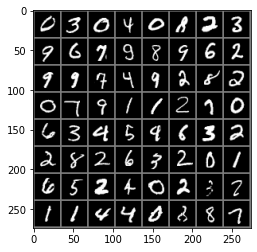

GroundTruth:   0  3  0  4  0  8  2  3


In [56]:
dataiter = iter(valloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%2s' % classes[labels[j]] for j in range(8)))

### Make a prediction for few samples

We take the images output from previous cell and feed them into our model to get some predictions.

The outputs are basically the index of the highest valued energy from the `outputs` variable

In [57]:
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%2s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:   0  3  0  4  0  8  2  3


### Testing on the complete dataset

Now that we have seen that out built model is able to predict digits correctly, we will use it to test on the rest of the validation (testing) dataset. 

In [227]:
# Eavluation phase
# (Just to tell the model that we're now doing testing/evaluation)
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 93 %


In [228]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 95 %
Accuracy of     2 : 87 %
Accuracy of     3 : 88 %
Accuracy of     4 : 92 %
Accuracy of     5 : 85 %
Accuracy of     6 : 96 %
Accuracy of     7 : 92 %
Accuracy of     8 : 92 %
Accuracy of     9 : 84 %


In order to see the effect of network architecure parameters, as well as loss function and optimizer, we perform several experiments with different parameters, and make a tabulation of results (accuracy).


# Experiments

All of the experiments were performed while changing only 1 parameter at time wrt 1st experiment, except for experiment 4 & 5.

The experiments:

1.   Default parameters
2.   Batch size -> halved
3.   Learning rate -> 10x increased
4.   Activation -> changed to Sigmoid
5.   Sigmoid + 10 epochs
6.   Pooling -> changed to Max
7.   Kernal size -> changed to 3x3
8.   Activatio -> ReLU
9.   Epochs -> increased to 10

|   Experiment No.   |  Rate | Batch Size | Epochs | Pooling | Kernal Size | Stride Length | Activation | Validation Accuracy |
|:------------------:|:-----:|:----------:|:------:|:-------:|:-----------:|:-------------:|:----------:|:-------------------:|
| 1 (default params) | 0.001 |     64     |    2   | Average |     5x5     |       1       |    tanh    |         96%         |
|          2         | 0.001 |     32     |    2   | Average |     5x5     |       1       |    tanh    |         93%         |
|          3         |  0.01 |     64     |    2   | Average |     5x5     |       1       |    tanh    |         97%         |
|          4         | 0.001 |     64     |    2   | Average |     5x5     |       1       |   sigmoid  |         11%         |
|          5         | 0.001 |     64     |   10   | Average |     5x5     |       1       |   sigmoid  |         11%         |
|          6         | 0.001 |     64     |    2   |   Max   |     5x5     |       1       |    tanh    |         92%         |
|          7         | 0.001 |     64     |    2   | Average |     3x3     |       1       |    tanh    |         90%         |
|          8         | 0.001 |     64     |    2   | Average |     5x5     |       1       |    ReLU    |         88%         |
|          9         | 0.001 |     64     |   10   | Average |     5x5     |       1       |    tanh    |         97%         |





Some observations:

*   Compared to the MLP model, the validation accuracy seems to be more or less similar. The highest we get for LeNet architecture is 97% with increased learning rate (from 0.001 to 0.01)
*   Sigmoid activation made the model perform the worst of all. Even if we train the model for more epochs, the validation accuracy still remains 11% only.
*   For changing the kernal size from 5x5 to 3x3, a modification to `self.linear1 = nn.Linear(1920, 84)` was needed to be done, since 3x3 kernal generated more number of nodes. The dimension of the tensor just before `linear1` layer was now `[64, 120, 4, 4]` for 3x3 (rather than `[64, 120, 1, 1]` for 5x5).
So in order to match the dimensions keeping the `batchsize` as `64`, we now needed `120*4*4=1920` as number of rows (aka the number of inputs to to the `linear1` layer)
*   In comparison to MLPClassifier, LeNet ***can*** maybe perform better, if appropriate parameters are given (experiment no. 3 & 9). But on this particular dataset (MNIST), there is really slim chances of improving the accuracy. Infact, it's actually rather difficult to get a really bad accuracy on MNIST dataset in general, since at the end of the day, it's just a toy dataset.

